# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [2]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

In [22]:
#Cal Slope
def Slope(xs,ys):
    m = round((np.mean(xs)*np.mean(ys)-np.mean(xs*ys))/(((np.mean(xs))**2)-np.mean(xs*xs)),2)
    return m

Slope(X,Y)


0.56

In [43]:
#Cal Y-Intercept
def Y_int(xs,ys):
    m = Slope(xs,ys)
    c= np.mean(ys)-m*np.mean(xs)
    return c

Y_int(X,Y)

6.32

In [24]:
#Y Series Prediction
def Y_Pred(xs, ys):
    m = Slope(xs,ys)
    c = Y_int(xs,ys)
    ypred=[]
    for x in xs:
        ypred.append(m*float(x) + c)
    return ypred

Predicted_Y = Y_Pred(X,Y)
Predicted_Y

[6.880000000000001,
 7.44,
 8.0,
 8.56,
 9.120000000000001,
 9.68,
 10.24,
 10.8,
 11.360000000000001,
 11.920000000000002]

In [25]:
def sq_err(y_a, y_b):
    """
    input
    y_a : true y values
    y_b : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    cum_sum = 0
    if len(y_a) != len(y_b):
        print("Error!  Recheck your values")
    else:
        for i in range(0,len(y_a)):
            cum_sum += (y_a[i]-y_b[i])**2
        return cum_sum
            


# Check the output with some toy data

sq_err(Y, Predicted_Y)

0.7520000000000007

In [26]:

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    #Numerator 
    num = sq_err(y_real, y_predicted)
    
    #Denominator
    y_mean=[]
    for i in range(0,len(y_real)):
        y_mean.append(np.mean(y_real))
    
    den = sq_err(y_real, y_mean)
        
    # 1 - Num/Den
    return (1 -(num/den))

r_squared(Y, Predicted_Y)



0.9715151515151514

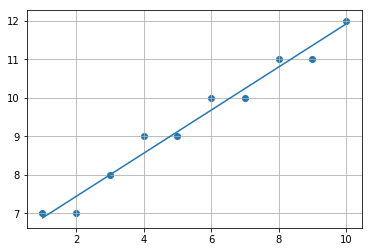

In [27]:
plt.scatter(X,Y)
plt.grid()
plt.plot(X,Predicted_Y)

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [31]:
#Cal Prediction at a single point
# def Pred(xs, ys):
#     m = Slope(xs,ys)
#     c = Y_int(xs,ys)
#     x = input("Enter the value of X for which you are predicting ")
#     y = m*float(x) + c
#     return y

# Pred(X,Y)
m = Slope(X,Y) 
c = Y_int(X,Y)
x_new=4.5
y_new = m*float(x_new) + c


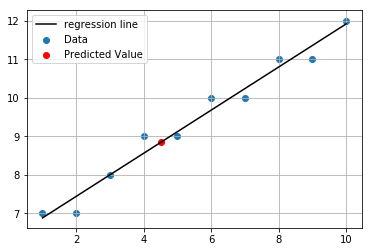

In [40]:
# Make prediction for x = 4.5 and visualize on the scatter plot
plt.scatter(X,Y, label='Data')
plt.grid()
plt.plot(X,Predicted_Y, color = 'black', label = 'regression line')
plt.scatter(x_new, y_new, color = "red", label = "Predicted Value")
plt.legend()
plt.show()


## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [41]:
df = pd.read_csv('./heightWeight.csv')

In [ ]:
# df = pd.read_csv('heightWeight.csv')
# weight_mean = df.weight.mean()
# height_mean = df.height.mean()
# df.height.std()
# m = (((np.mean(df.height)*np.mean(df.weight)) - np.mean(df.height*df.weight)) /
#         ((np.mean(df.height)**2) - np.mean(df.height*df.height)))
# c = weight_mean- height_mean* m
# m, c

In [51]:
m = Slope(df.height, df.weight)
c = Y_int(df.height, df.weight)
Predicted_Weights = Y_Pred(df.height, df.weight)
Rsquared = r_squared(df.weight, Predicted_Weights)
print(Rsquared)
print("The R-Dquared value is close to 1, there is a very strong coorelation between height and Weight")

0.9553098989164241
The R-Dquared value is close to 1, there is a very strong coorelation between height and Weight


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

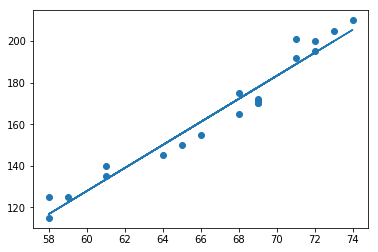

In [49]:
plt.scatter(df.height, df.weight)
plt.plot(df.height, Predicted_Weights)